# DataFrames and Random Sampling

So far we have randomly sampled from a list or array. We can also randomly sample from DataFrames! This is advantageous in the situation where we want to select a random subset of data to build predictive models or to analyze.

Using a small example, we'll turn our six-sixed die into a DataFrame.

In [1]:
import numpy as np
import pandas as pd

In [2]:
die = pd.DataFrame(
    {
        'Face': np.arange(1, 7),
    }
)

die

,Face
0,1
1,2
2,3
3,4
4,5
5,6


We see that this DataFrame has 6 rows and 1 column.

Similar to randomly selecting an option from a list, we can randomly sample from a DataFrame, using the DataFrame's `sample` method.

This method randomly selects an entire row or rows from the DataFrame. Below, the input argument `1` denotes that we want to select exactly one row. We can choose to sample more than one row by changing this input.

In [3]:
die.sample(1)

,Face
1,2


Some additional arguments to this function include:

- `replace`: whether to "replace" rows for re-sampling (note: `np.random.choice()` also has this argument!)
- `random_state`: the initial state of the pseudo-random generator

Setting the replace option to `True` allows us to sample the same row more than once. With this option, we are choosing a row, replacing it in the "pool" of options to sample, and choosing our next row from the original DataFrame. Setting this option to `False` allows us to choose a row exactly once. The default in pandas is `replace=False`.

Setting the "random state" equal to some integer allows for reproducibility of results. With this option, `sample` still gives as "random" a result, but it will be the same "random" result each time we run our experiment. ("True" randomness is, after all, the domain of quantum mechanics!) Note that for now this is not extremely important, but it will be useful for predictive modeling in the future.


In [4]:
die.sample(10, replace=True, random_state=1)

,Face
5,6
3,4
4,5
0,1
1,2
3,4
5,6
0,1
0,1
1,2


Above, we randomly selected 10 rows with replacement, corresponding to our rolling a die 10 times.

We can now visualize the results of these random samples with a histogram. This will give us an idea of the how often each number is rolled. If we only roll the die 12 times, some numbers appear with much greater frequency than others.

In [5]:
# note, starting the bins at 0.5 will give us bars centered nicely over the face numbers

roll_bins = np.arange(0.5, 7, 1)

roll_bins

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

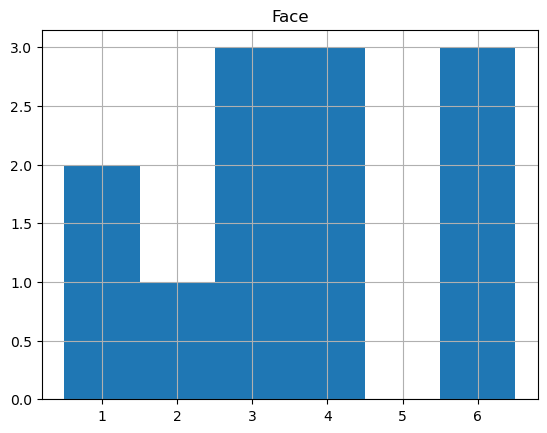

In [6]:
die.sample(12, replace=True).hist(bins=roll_bins);

Randomly sampling 1,000 rolls of the die we start to see a more evenly distrbuted histogram.

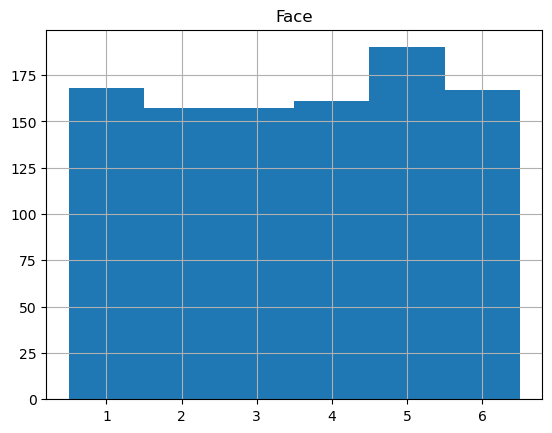

In [7]:
die.sample(1_000, replace=True).hist(bins=roll_bins);

Let's see how the distribution changes as we increase the number of randomly sampled rolls of a six-sided die.

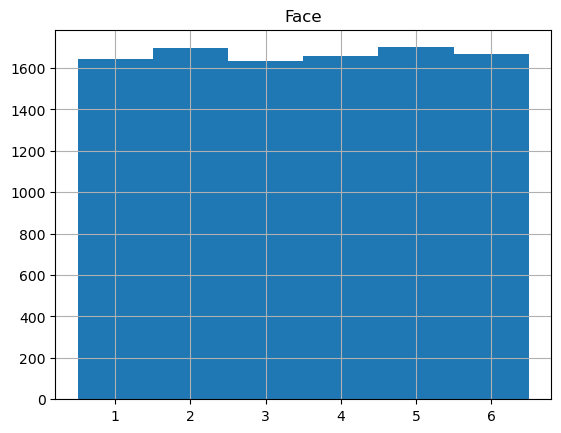

In [8]:
die.sample(10_000, replace=True).hist(bins=roll_bins);

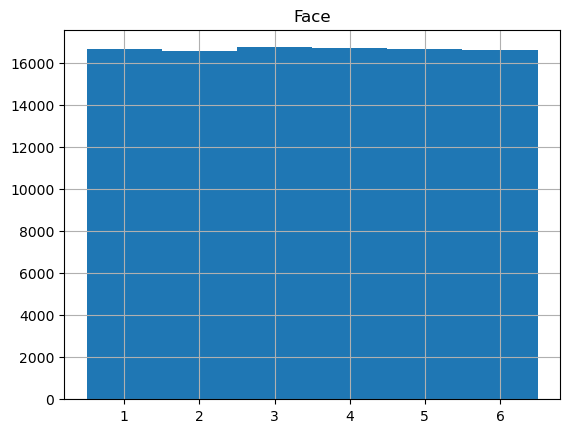

In [9]:
die.sample(100_000, replace=True).hist(bins=roll_bins);

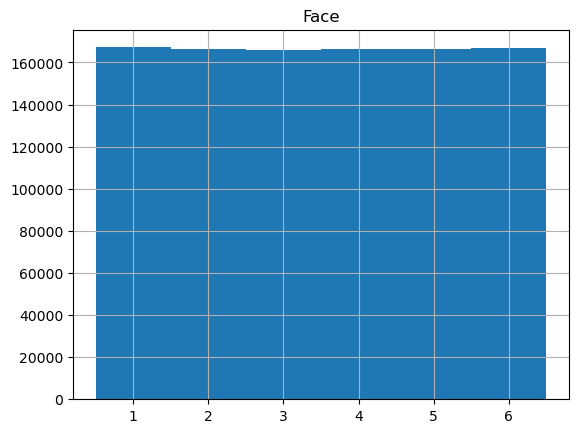

In [10]:
die.sample(1_000_000, replace=True).hist(bins=roll_bins);

As the number of samples increases – that is, as we roll the die many many many times – we find that the each face of the die occurs roughly the same number of times. We will explain this in more detail in Chapter (chapter number here...law of large numbers or central limit theorem chapter?)